<b><h2>2.Comparing Bayes, logistic, and KNN classifiers.</h2><br>In lectures we learn three different classifiers.  This question is to implement and compare them.  We are suggest use Scikit-learn, which is a commonly used and powerful Python library with various machine learning tools.  But you can also use other similar library in other languages of your choice to perform the tasks.</b>

<h3>Part One (Divorce classification/prediction).  <t>(30 points)</h3>
<br>
<b>This dataset is about participants who completed the personal information form and a divorce predic-tors scale. The data is a modified version of the publicly available at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so you will not replicate the results on uci web-site).  There are 170 participants and 54 attributes (or predictor variables) that are all real-valued.  The dataset <b>q3.csv</b>.  The last column of the CSV file is label <i>y</i> (1 means “divorce”, 0 means “no divorce”). Each column is for one feature (predictor variable), and each row is a sample (participant).  A detailed explanation for each feature (predictor variable) can be found at the website link above.  Our goal is to build a classifier using training data, such that given a test sample, we can classify (or essentially predict) whether its label is 0 (“no divorce”) or 1 (“divorce”). Build  three  classifiers  using  (Naive  Bayes,  Logistic  Regression,  KNN).  Use  the  first  80%  data  for training and the remaining 20% for testing.  If you use scikit-learn you can use <i>train_test_split</i> to split the dataset.</b>

(a)  <b>Report testing accuracy for each of the three classifiers.  Comment on their performance:  which performs the best and make a guess why they perform the best in this setting.</b>

In [1]:
# import imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # see if we need this
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# now get and clean the data
data = pd.read_csv('q3.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


In [3]:
# split the data into training and test sets
X = data.drop(54, axis =1)
y = data[54]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)


In [4]:
# Get classifiers: Naive Bayes, Logistic Regression, KNN
gnb = GaussianNB()
y_pred_GNB = gnb.fit(X_train, y_train).predict(X_test)
print("Naiive Bayes: \t\tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_GNB).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_GNB).sum())/X_test.shape[0]*100))

clf = LogisticRegression(solver='lbfgs')#(random_state = 455421, solver = 'lbfgs')
y_pred_LogReg = clf.fit(X_train, y_train).predict(X_test)
print("Logistic Regression: \tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_LogReg).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_LogReg).sum())/X_test.shape[0]*100))

knn = KNeighborsClassifier()#(n_neighbors = 5, algorithm = 'kd_tree')
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)
print("K Nearest Neighbors: \tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_knn).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_knn).sum())/X_test.shape[0]*100))

Naiive Bayes: 		Number of mislabeled points out of a total 34 points : 1
Accuracy: 		97.059 %

Logistic Regression: 	Number of mislabeled points out of a total 34 points : 1
Accuracy: 		97.059 %

K Nearest Neighbors: 	Number of mislabeled points out of a total 34 points : 1
Accuracy: 		97.059 %



All algorithms converge to the correct classifications. This is likely due to several factors, chief of which is that the data is well suited to each classifier. The data can be approximated by a bimodal Gaussian distribution which aides the Naive Bayes classifier. The data is also well suited for logistic regression, though the algorithm needs about 38 iterations for the algorithm to converge. Both Naive Bayes (Gaussian) and Logistic Regression have a linear decision boundary, for which this data is well suited. Lastly, the nearest neighbors classifier performs well because the data is naturally clustered in the $\mathbb{R}^{54}$ feature space -- in fact when tuning this algorithm it only breaks when the network is extremely overconnected (>130 neighbors).

(b)  <b>Use the first two features to train three new classifiers.  Plot the data points and decision boundary of each classifier.  Comment on the difference between the decision boundary for the three classifiers.  Please clearly represent the data points with different labels using different colors.</b>

In [5]:
Xs = data[[0,1]]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.20, random_state=15)
ys_pred_GNB = gnb.fit(Xs_train, ys_train).predict(Xs_test)
ys_pred_LogReg = clf.fit(Xs_train, ys_train).predict(Xs_test)
ys_pred_knn = knn.fit(Xs_train, ys_train).predict(Xs_test)

In [6]:
xmin = min(Xs[0])-1
ymin = min(Xs[1])-1
xmax = max(Xs[0])+1
ymax = max(Xs[1])+1

xv, yv = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]


<b><u>FOR ALL PLOTS BELOW:</u></b><br>
The <b><font color = 'darkred'>dark red</font></b> on the left corresponds to points that should be <b><font color ='red'>red</font></b>. The <b>lighter color</b> on the right corresponds to points that should be <b><font color ='blue'>blue</font></b>. 

Text(0, 0.5, 'x2')

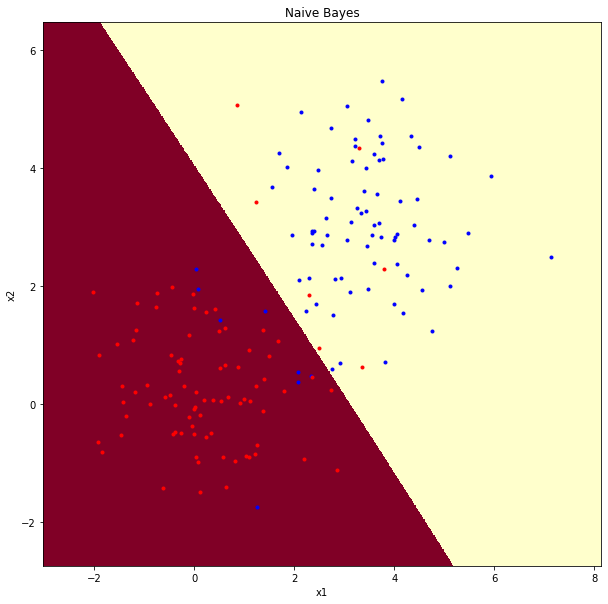

In [7]:
#now the naive bayes classifier
A_GNB = gnb.fit(Xs_train, ys_train).predict(np.c_[xv.ravel(),yv.ravel()])
A_GNB = A_GNB.reshape(xv.shape)
# plt.contour(xv, yv, A_GNB, cmap = 'RdBu_r')
plt.figure(figsize=(10,10))
plt.pcolormesh(xv, yv, A_GNB, cmap = 'YlOrRd_r')
plt.plot(Xs[0][y==1],Xs[1][y==1], 'b.')
plt.plot(Xs[0][y==0],Xs[1][y==0], 'r.')
plt.title('Naive Bayes')
plt.xlabel('x1')
plt.ylabel('x2')

The Gaussian Naive Bayes decision boundary is a linear boundary in the $x_1$, $x_2$ space. The reason for this can be proven mathematically, but I will not do so here. Here is a [link](https://stats.stackexchange.com/questions/369849/proving-that-gaussian-naive-bayes-decision-boundary-is-linear) to a proof if you are interested in why. You can clearly see that using a linear decision boundary like Gaussian Naive Bayes, some points will be misclassified as there is no way to bisect the data with 100% accuracy using a line. 

Text(0, 0.5, 'x2')

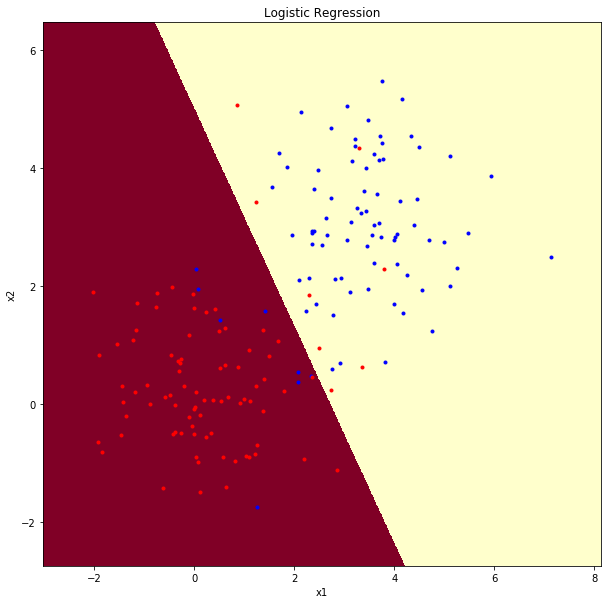

In [8]:
#now the logistic regression classifier
A_LogReg = clf.fit(Xs_train, ys_train).predict(np.c_[xv.ravel(),yv.ravel()])
A_LogReg = A_LogReg.reshape(xv.shape)
# plt.contour(xv, yv, A_GNB, cmap = 'RdBu_r')
plt.figure(figsize=(10,10))
plt.pcolormesh(xv, yv, A_LogReg, cmap = 'YlOrRd_r')
plt.plot(Xs[0][y==1],Xs[1][y==1], 'b.')
plt.plot(Xs[0][y==0],Xs[1][y==0], 'r.')
plt.title('Logistic Regression')
plt.xlabel('x1')
plt.ylabel('x2')

Similar to the Naive Bayes case, the logistic regression boundary is linear. The slope is different from the Naive Bayes classifier boundary, but the number of points that get classified incorrectly by logistic regression is identical to that of Gaussian Naive Bayes. 

Text(0, 0.5, 'x2')

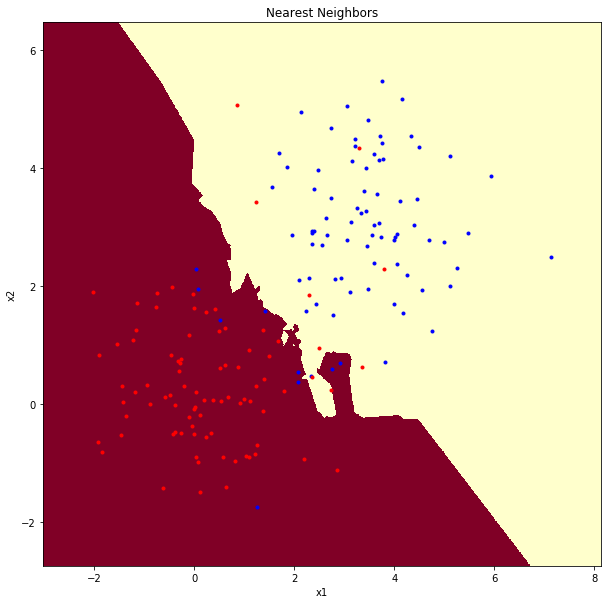

In [9]:
#now the nearest neighbors classifier
A_knn = knn.fit(Xs_train, ys_train).predict(np.c_[xv.ravel(),yv.ravel()])
A_knn = A_knn.reshape(xv.shape)
# plt.contour(xv, yv, A_GNB, cmap = 'RdBu_r')
plt.figure(figsize=(10,10))
plt.pcolormesh(xv, yv, A_knn, cmap = 'YlOrRd_r')
plt.plot(Xs[0][y==1],Xs[1][y==1], 'b.')
plt.plot(Xs[0][y==0],Xs[1][y==0], 'r.')
plt.title('Nearest Neighbors')
plt.xlabel('x1')
plt.ylabel('x2')

The Nearest Neighbors classifier does not have a linear decision boundary. As such we see a more squiggly line than in the Naive Bayes or Logistic Regression classifier cases. On the full dataset the Nearest Neighbors classifier actually seems to do worse than the other two classifers. It also might be that these two features ($x_1$ and $x_2$) are particularly ill-suited for Nearest Neighbors classification amongst others in the dataset. Nearest neighbors also takes much longer than the other two classifiers to converge. 

<h3>Part Two (Handwritten digits classification).<t>(20 points)</h3><br> <b>Repeat the above using the MNIST Data in our Homework 3.  Here, give “digit” 6 label $y=1$, and give “digit” 2 label $y= 0$.  All the pixels in each image will be the feature (predictor variables) for that sample (i.e., image).  Our goal is to build classifier to such that given a new test sample, we can tell is it a 2 or a 6.  Using the first 80% of the samples for training and remaining 20% for testing.  Report the classification accuracy on testing data, for each of the three classifiers.  Comment on their performance:  which performs the best and make a guess why they perform the best in this setting.</b>

In [10]:
# read data and do preprocessing (unscrew the column order storage artifact!)
import math


data = pd.read_csv('data.dat', sep='\s+', header=None).values
(P, N) = data.shape
p = int(math.sqrt(P))
data = data.T.reshape((N, p, p), order='F').reshape((N,P)).T

In [11]:
#relabel the data
olabels = pd.read_csv('label.dat', sep='\s+', header=None).values
nlabels = (olabels == 6).astype(int)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.T, nlabels.T, test_size=0.20, random_state=15)
y_train = y_train.reshape((X_train.shape[0]))
y_test = y_test.reshape((X_test.shape[0]))

In [13]:
# Get classifiers: Naive Bayes, Logistic Regression, KNN
gnb = GaussianNB()
y_pred_GNB = gnb.fit(X_train, y_train).predict(X_test)
print("Naiive Bayes: \t\tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_GNB).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_GNB).sum())/X_test.shape[0]*100))

clf = LogisticRegression(solver='lbfgs')#(random_state = 455421, solver = 'lbfgs')
y_pred_LogReg = clf.fit(X_train, y_train).predict(X_test)
print("Logistic Regression: \tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_LogReg).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_LogReg).sum())/X_test.shape[0]*100))

knn = KNeighborsClassifier()#(n_neighbors = 5, algorithm = 'kd_tree')
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)
print("K Nearest Neighbors: \tNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred_knn).sum()))
print("Accuracy: \t\t{:2.3f} %\n".format((X_test.shape[0]-(y_test != y_pred_knn).sum())/X_test.shape[0]*100))

Naiive Bayes: 		Number of mislabeled points out of a total 398 points : 83
Accuracy: 		79.146 %

Logistic Regression: 	Number of mislabeled points out of a total 398 points : 9
Accuracy: 		97.739 %

K Nearest Neighbors: 	Number of mislabeled points out of a total 398 points : 2
Accuracy: 		99.497 %



The Gaussian Naive Bayes performs the worst on unseen data. This is likely due to the fact that the Naive Bayes classifer assumes that all input dimensions are independent. For example: the likelihood that a pixel will be black <i>is</i> contingent on whether the nearby pixels are black, however Naive Bayes treats each pixel as independent from the others.

Logistic regression performs well on unseen data, but Nearest Neighbors performs the best. My guess for why this is the case is similar to what we saw with the Divorce data: the dissimiliarity between pixels of similar shape and layout (indicating the handwritten digit is the same) is smaller, meaning the neighborhoods are smaller and the pixel data will be more tightly clustered in the $\mathbb{R}^{784}$ space for images that are similar (have same labels). 